In [1]:
import pandas as pd 
import os
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 200)  # Adjust this number as needed
pd.set_option('display.max_columns', 50)  # Adjust this number as needed

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_box_plot(df, df_name='event_category'):
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')
    plt.xlabel('Number of Events')
    plt.ylabel('Percentage Visit Change')
    plt.title(df_name)

    # Save the plot
    plt.savefig(f'../../results/2.3.2_box_plots/{df_name}.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


In [31]:
def data_processing(df, df_name=''):
    try:
        # Step 1: Get new columns - day of the week and hour
        df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format
        df['date_without_time'] = df['Date'].dt.date  # Extract only the date
        df['day_of_week'] = df['Date'].dt.day_name()  # Get the day name (e.g., Monday, Tuesday)
        df['hour'] = df['Date'].dt.hour  # Get the hour of the day
        print("Step 1: Date processing completed successfully.")

        # Step 2: Calculate total visits on the day
        df['total_visits_on_the_day'] = df.groupby(['BGFIPS', 'date_without_time'])['Visits_Mobility'].transform('sum')
        print("Step 2: Total visits calculation completed successfully.")

        # Step 3: Calculate the mean visits per day per weekday
        df['avg_visits_perday_perweekday'] = df.groupby(['BGFIPS', 'day_of_week'])['total_visits_on_the_day'].transform('mean')
        print("Step 3: Average visits calculation completed successfully.")

        # Step 4: Group by 'date_without_time' and 'BGFIPS', count unique 'EVENT_ID's, and merge the rows
        df_num_events = df.groupby(['date_without_time', 'BGFIPS'], as_index=False).agg(num_events=('EVENT_ID', 'nunique'))
        df = pd.merge(df, df_num_events, on=['date_without_time', 'BGFIPS'], how='left')
        print("Step 4: Event count and merge completed successfully.")

        # Step 5: Calculate percentage visit change
        df['percentage_visit_change'] = (df['total_visits_on_the_day'] - df['avg_visits_perday_perweekday']) / df['avg_visits_perday_perweekday']
        print("Step 5: Percentage visit change calculation completed successfully.")

        # Step 6: Save dataset
        output_path = f'../../data_CityEvent/processed/2.3.2_processed_daily/{df_name}.csv'
        df.to_csv(output_path, index=False)
        print(f"Step 6: Dataset saved successfully to {output_path}.")

        # Step 7: Show Box Plot
        create_box_plot(df, df_name)
        print("Step 7: Box plot created successfully.")
        
    except Exception as e:
        print(f"An error occurred during processing: {e}")
        
    # Optionally return the modified dataframe for further use
    return df


In [32]:
import os
# LOOP
filepath = '../../data_CityEvent/processed/1.5.3_events_join_w_mobility/'
filenames = os.listdir(filepath)
print(filenames)

['attended_community_hourly_visits.csv', 'attended_concerts_hourly_visits.csv', 'attended_conferences_hourly_visits.csv', 'attended_expos_hourly_visits.csv', 'attended_festivals_hourly_visits.csv', 'attended_performing-arts_hourly_visits.csv', 'attended_sports_hourly_visits.csv', 'non_attended_academic_hourly_visits.csv', 'non_attended_daylight-savings_hourly_visits.csv', 'non_attended_observances_hourly_visits.csv', 'non_attended_politics_hourly_visits.csv', 'non_attended_public-holidays_hourly_visits.csv', 'non_attended_school-holidays_hourly_visits.csv', 'unscheduled_airport-delays_hourly_visits.csv', 'unscheduled_disasters_hourly_visits.csv', 'unscheduled_health-warnings_hourly_visits.csv', 'unscheduled_severe-weather_hourly_visits.csv', 'unscheduled_terror_hourly_visits.csv']


Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/attended_community.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


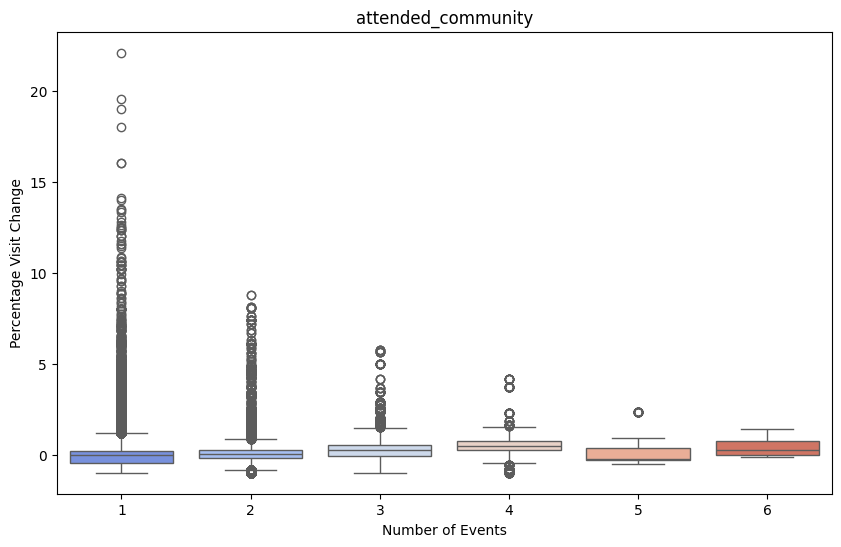

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/attended_concerts.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


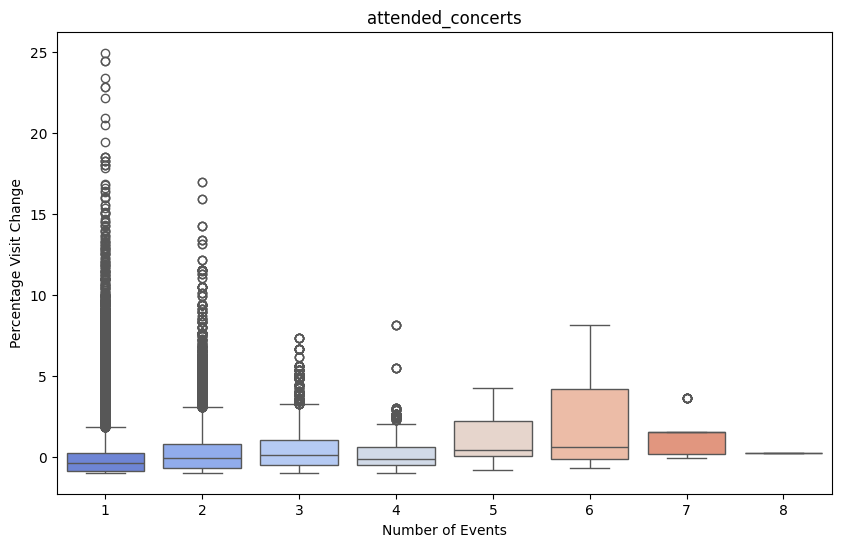

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/attended_conferences.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


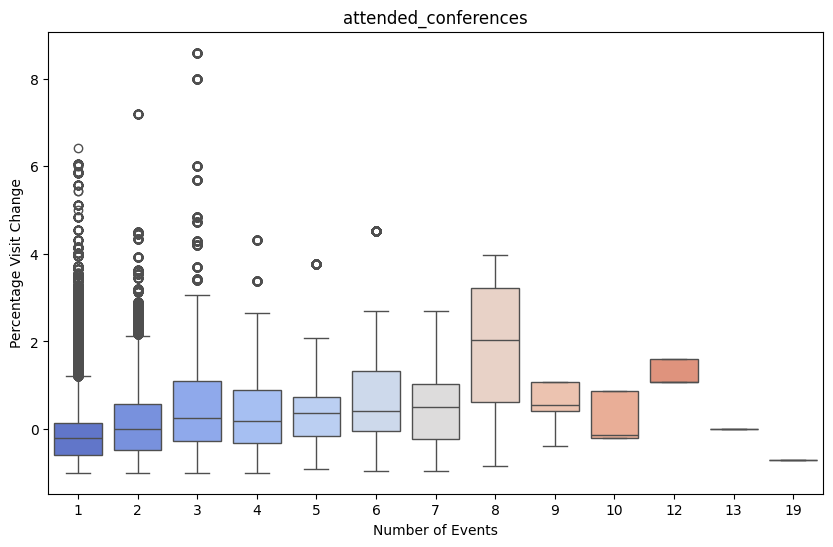

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/attended_expos.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


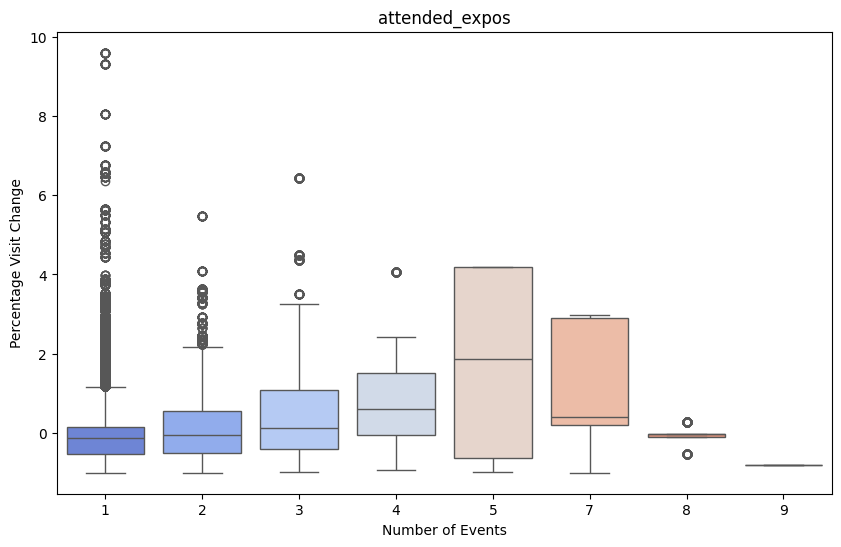

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/attended_festivals.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


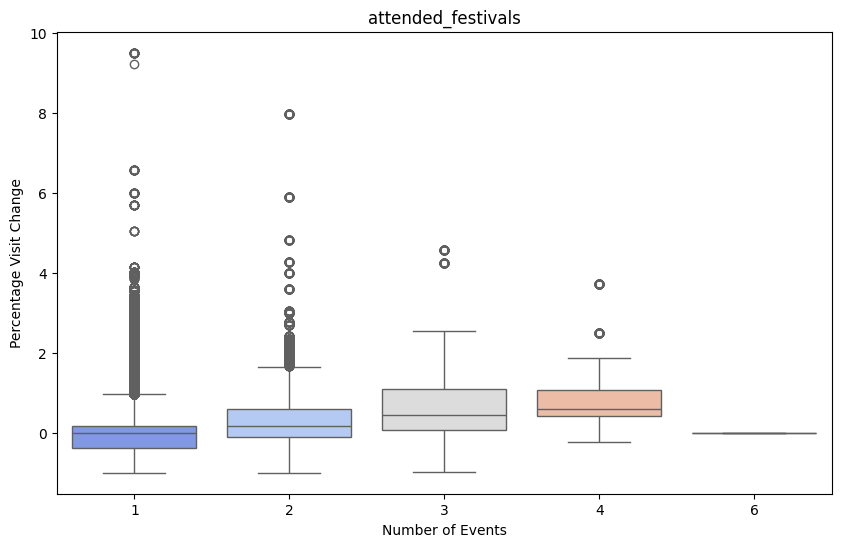

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/attended_performing-arts.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


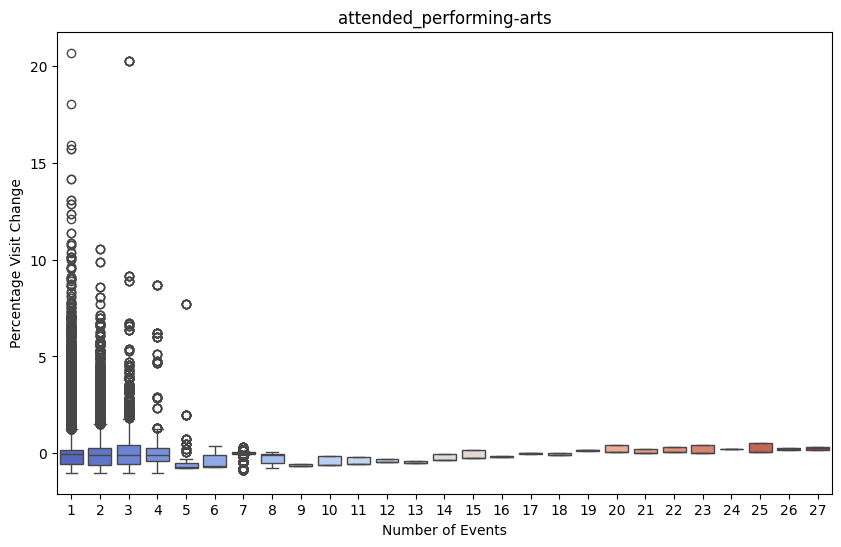

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/attended_sports.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


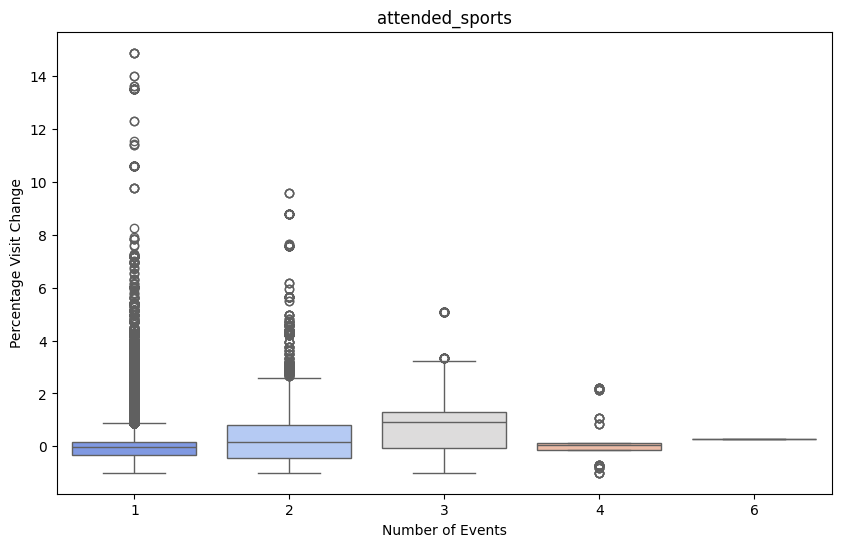

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/non_attended_academic.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


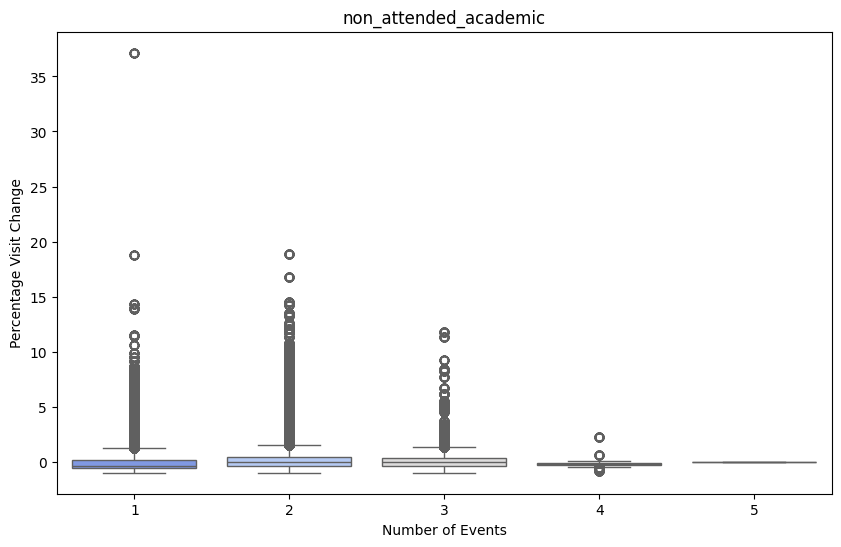

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/non_attended_daylight-savings.csv.
An error occurred during processing: local variable 'boxprops' referenced before assignment
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/non_attended_observances.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


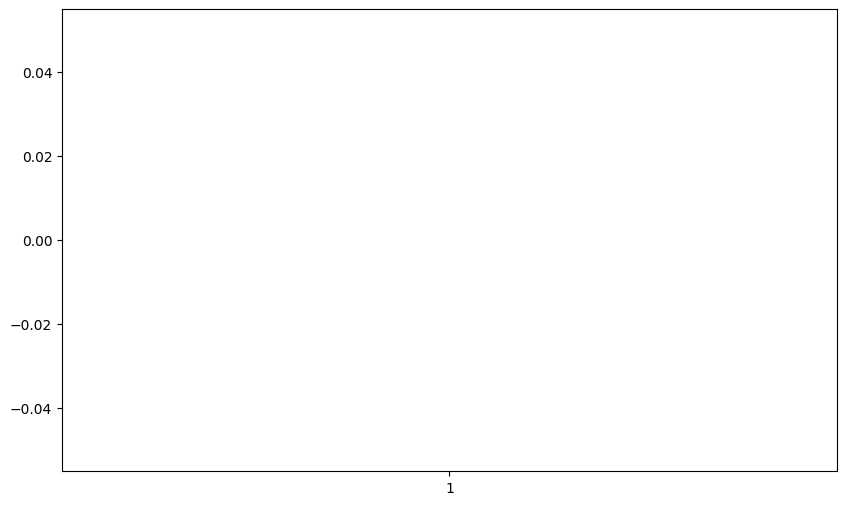

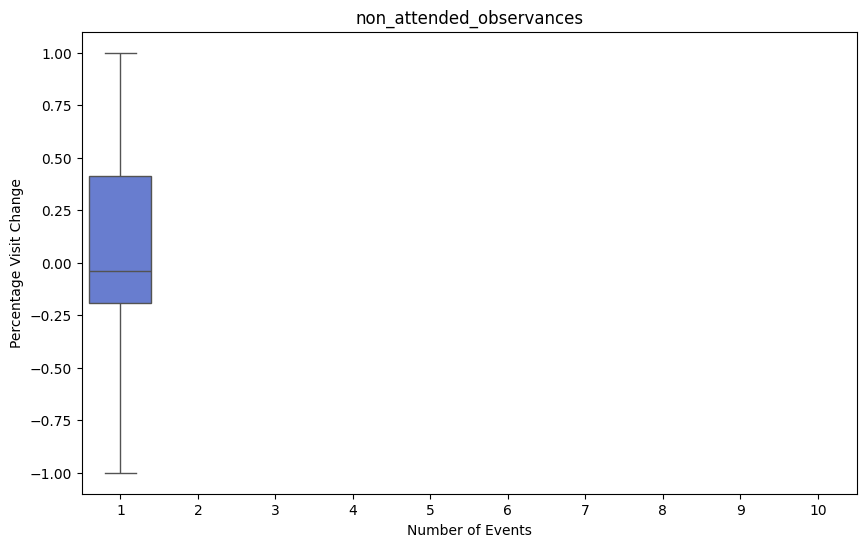

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/non_attended_politics.csv.
An error occurred during processing: local variable 'boxprops' referenced before assignment
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/non_attended_public-holidays.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


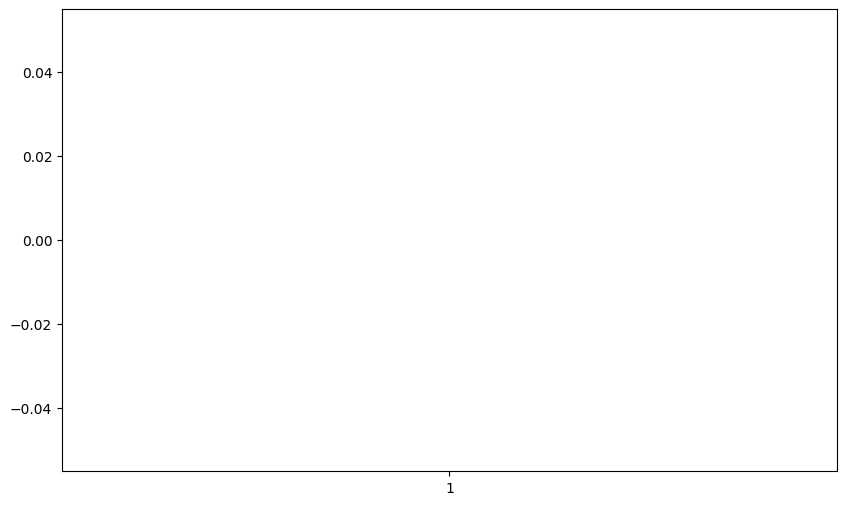

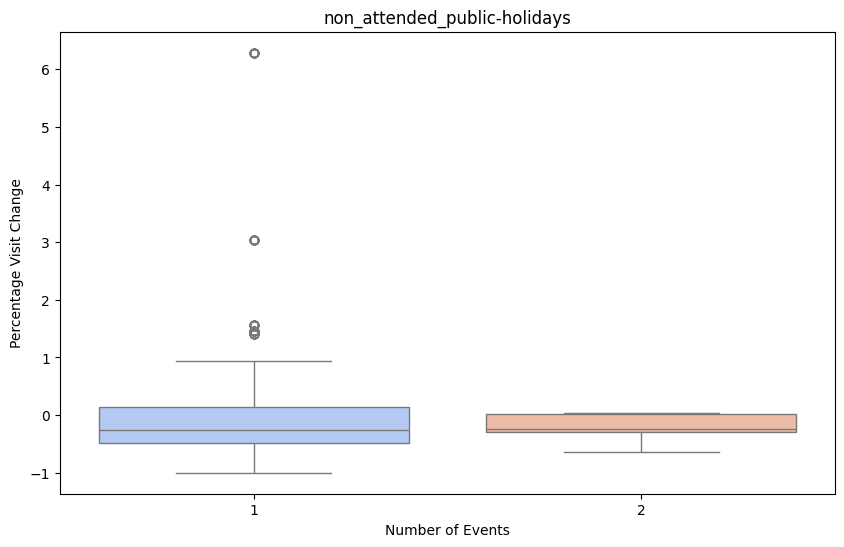

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/non_attended_school-holidays.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


An error occurred during processing: Unable to allocate 60.1 MiB for an array with shape (7880131,) and data type object
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/unscheduled_airport-delays.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


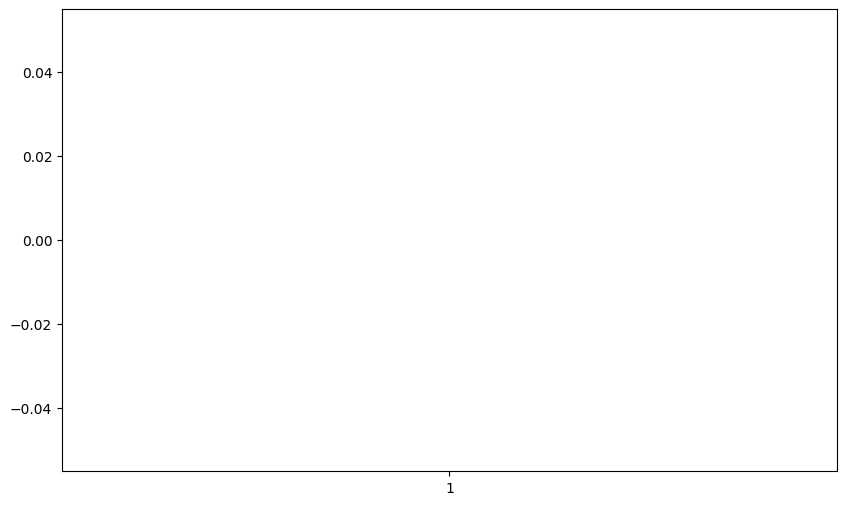

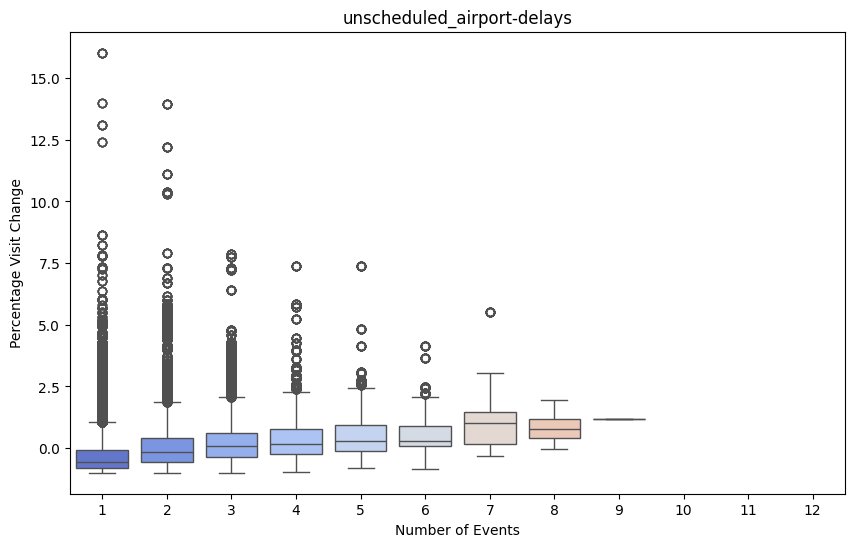

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/unscheduled_disasters.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


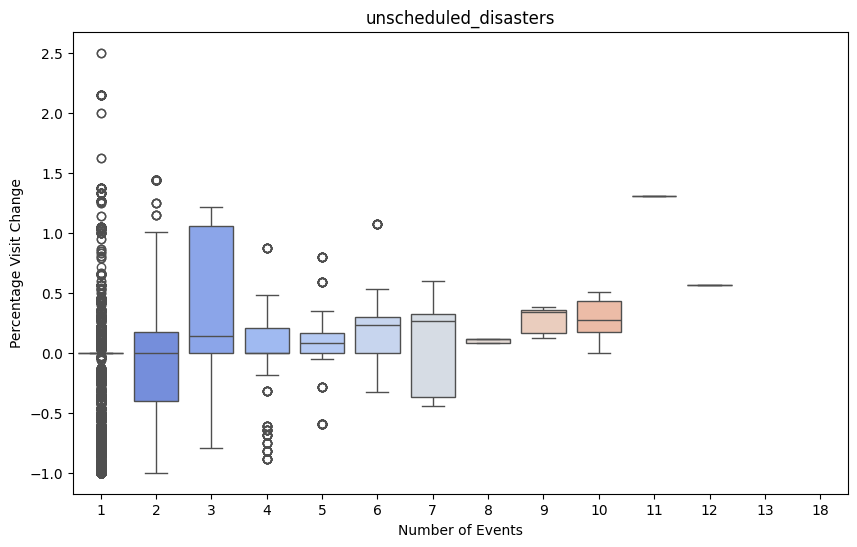

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/unscheduled_health-warnings.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


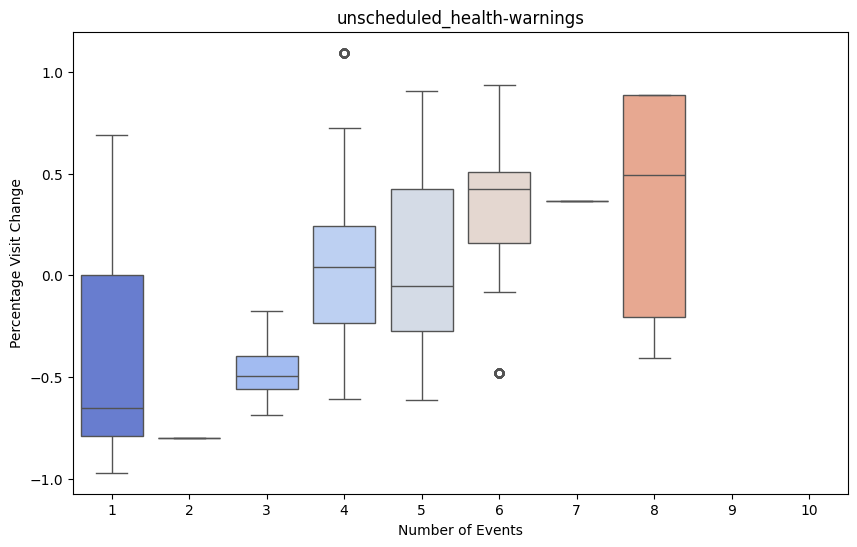

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/unscheduled_severe-weather.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


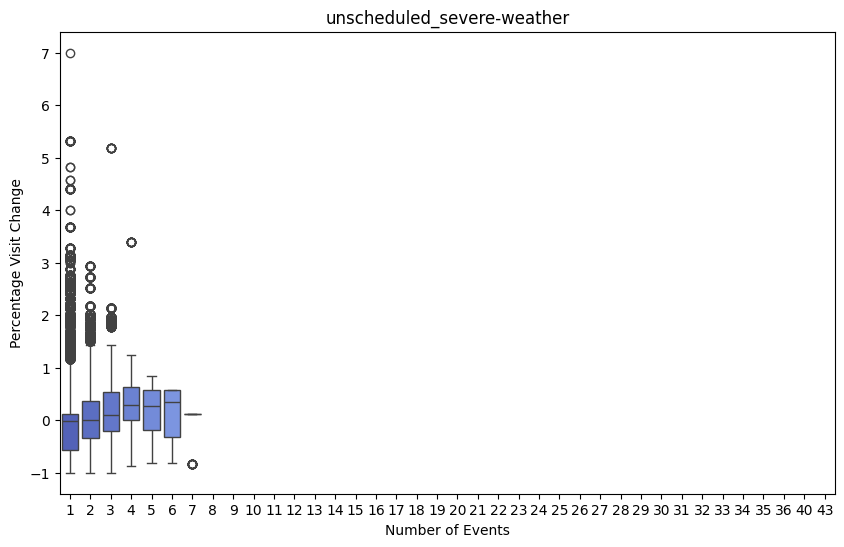

Step 7: Box plot created successfully.
Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.
Step 6: Dataset saved successfully to ../../data_CityEvent/processed/2.3.2_processed_daily/unscheduled_terror.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_5876\2617099081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


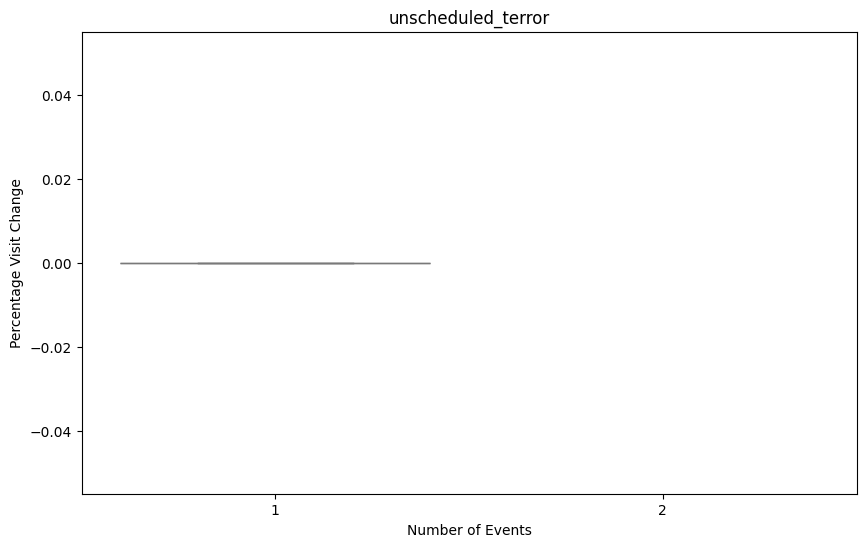

Step 7: Box plot created successfully.


In [33]:
for filename in filenames:
    
    df_name = filename[:-18]
    df = pd.read_csv(f'{filepath}/{df_name}_hourly_visits.csv')
    # print(df.shape)

    data_processing(df, df_name)